In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
labs = [
    #'composite_behaviours',
    'subsumption_architecture',
    'motor_schemas'
]

dirs = [
    #'lab_activity-02',
    'lab_activity-03',
    'lab_activity-04']
dfs = []

In [92]:
for dir, lab in zip(dirs, labs):
    df = pd.read_csv(f'{dir}/performance_evaluation/results.txt', header=None)
    df['name'] = dir
    df['lab'] = lab
    dfs.append(df)

In [93]:
combined_df = pd.concat(dfs)

In [103]:
print(combined_df.info())
print(combined_df.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   name    2000 non-null   object 
 2   lab     2000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 62.5+ KB
None
    count      mean      std       min       25%       50%       75%       max
0  2000.0  0.790878  0.87793  0.135449  0.376018  0.483505  0.520547  4.802051


In [104]:
df = combined_df.groupby('name')

In [105]:
print(df.describe())

                      0                                                    \
                  count      mean       std       min       25%       50%   
name                                                                        
lab_activity-03  1000.0  0.577791  0.679170  0.135449  0.353845  0.377805   
lab_activity-04  1000.0  1.003964  0.995048  0.140637  0.489678  0.512185   

                                     
                      75%       max  
name                                 
lab_activity-03  0.437811  4.422663  
lab_activity-04  0.892344  4.802051  


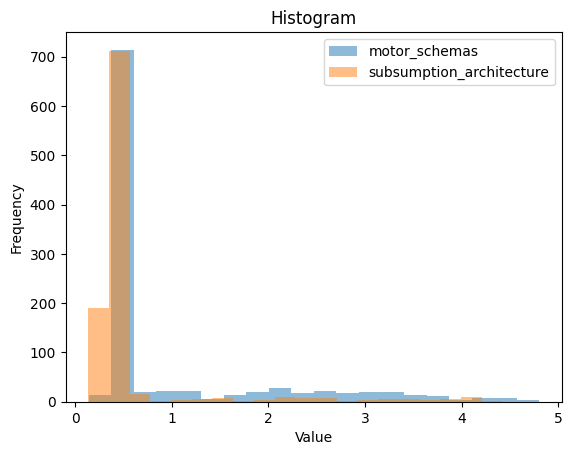

In [106]:
grouped_df = combined_df.groupby('lab')

for file_name, group in grouped_df:
    plt.hist(group[0], bins=20, alpha=0.5, label=file_name)
    
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.legend()
plt.show()


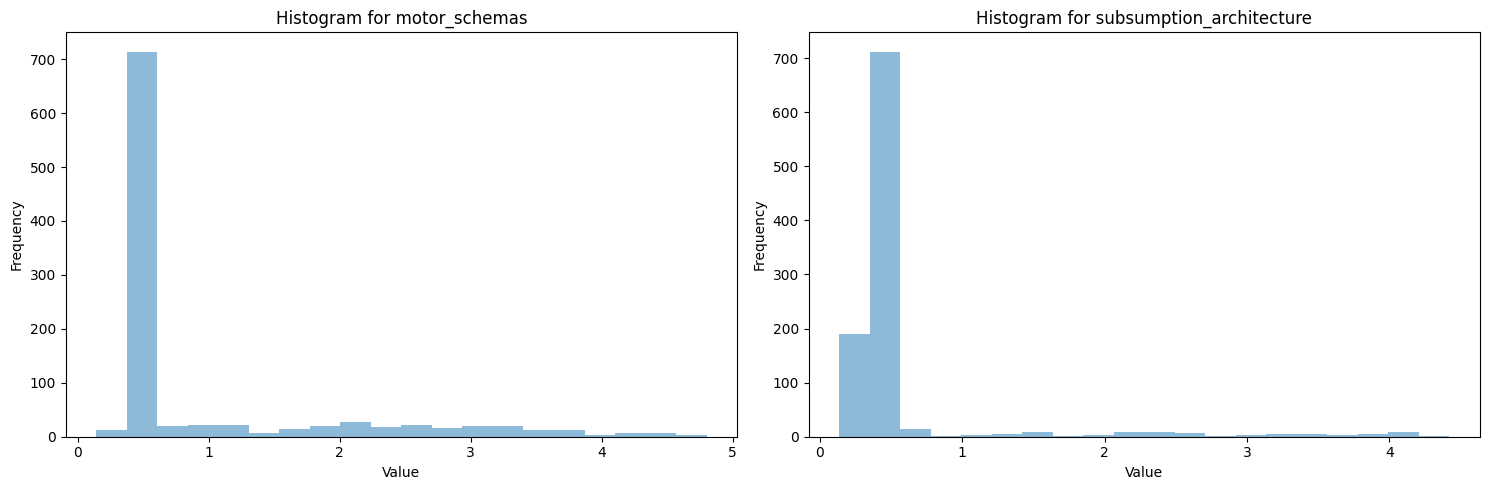

In [107]:
grouped_df = combined_df.groupby('lab')

num_groups = len(grouped_df)

fig, axes = plt.subplots(1, num_groups, figsize=(15, 5))

for ax, (file_name, group) in zip(axes, grouped_df):
    ax.hist(group[0], bins=20, alpha=0.5)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram for {file_name}')

plt.tight_layout()

plt.show()

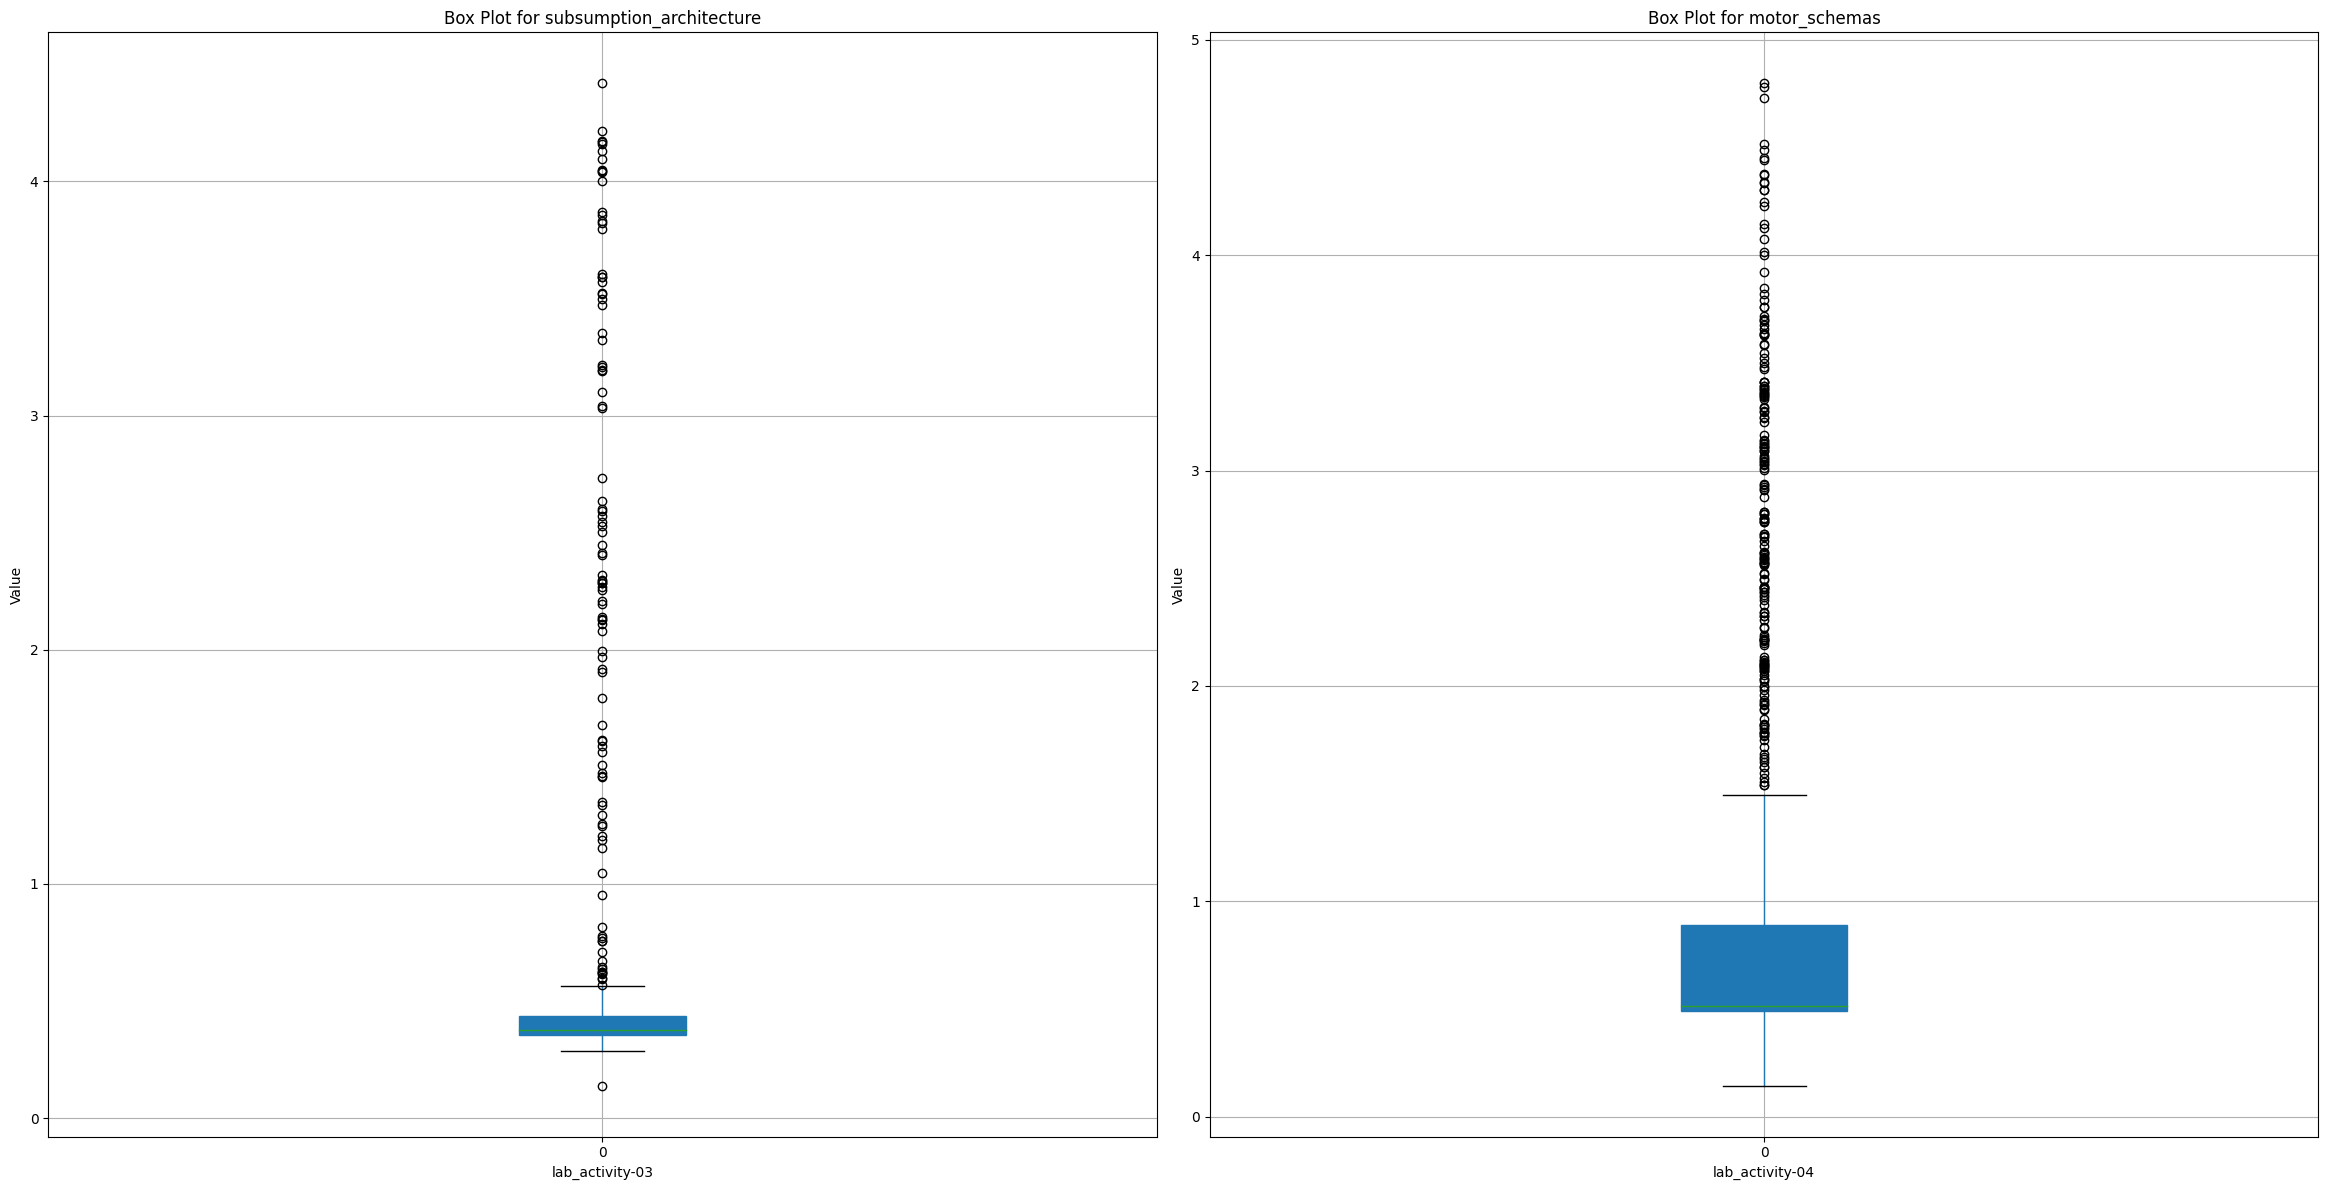

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 12))

for i, df in enumerate(dfs, start=1):
    plt.subplot(1, 3, i)
    boxplot = df.boxplot(column=0, patch_artist=True)

    plt.xlabel(df["name"][0])
    plt.ylabel('Value')
    plt.title(f'Box Plot for {df["lab"][0]}')

plt.tight_layout()

plt.show()